In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gráficos de funções de duas variáveis

## $ \S 1 $ Introdução

Muitas quantidades dependem de mais de uma variável.  Por exemplo, a área de uma
chapa retangular é dada pelo produto do seu comprimento e da sua largura. O
brilho de uma estrela vista da Terra depende da sua distância e da sua
luminosidade. A função $ V = \pi r^2 h $ expressa o volume de uma lata
cilíndrica em termos do seu raio $ r $ e da sua altura $ h $. Similarmente, $
f(x, y) = x^2 + y^2 $ calcula a altura $ z $ de um parabolóide acima do ponto $
(x, y) $ em $ \mathbb R^2 $.


__Exemplo (função de Cobb-Douglas):__
A _função de produção de Cobb-Douglas_ é utilizada em economia para
modelar a relação entre dois ou mais insumos, geralmente capital e trabalho, e a
quantidade de produto resultante. A sua forma geral é:
$$
    Q(C, T) = A  C^\alpha T^\beta\,, \qquad \text{onde}
$$
* $ Q $ é a quantidade do produto final.
* $ C $ é a quantidade de capital despendido.
* $ T $ é a quantidade de trabalho.
* $ A $ é uma constante, que representa a produtividade ou eficiência tecnológica.
* $ \alpha $ e $ \beta $ são os expoentes (constantes) que indicam a elasticidade da produção
  em relação ao capital e ao trabalho, respectivamente.

Observe que apesar de $ Q $ depender de vários parâmetros, apenas $ C $ e $ T $
_não_ são constantes. Dizemos que estas são as __variáveis independentes__, e que
portanto $ Q $ é uma função de $ C $ e $ T $. Um economista procuraria
entender como a __variável dependente__ $ Q $ muda de valor conforme $ C $ e $ T
$ variam, para tirar conclusões a respeito da situação concreta à qual
este modelo está sendo aplicado.

O __domínio__ $ D \subseteq \mathbb R^2 $ de uma função $ f $ de duas variáveis
é o conjunto dos pontos $ (x, y) $ para os quais ela está definida. Escrevemos
$ f \colon D \to \mathbb R $ para indicar que $ f $ é uma função real definida
em $ D $, e representamos $ D $ como uma região no plano-$ xy $.

O __gráfico__ $ G_f $ de uma função de duas variáveis $ f $ é o conjunto de
todos os pontos $ (x, y, z) $ no espaço tridimensional $\mathbb{R}^3$ tais que
$ z $ é o valor de $ f $ em $ (x, y) $, ou seja,
$$
G_f = \{ (x, y, z) \in D : (x, y) \in D \text{ e } z = f(x, y) \}\,.
$$
Geometricamente, o gráfico de uma função de duas variáveis pode ser interpretado
como uma superfície bidimensional no espaço ambiente $ \mathbb R^3 $, tal que a
sua altura $ z $ acima de um ponto $ (x, y) $ no plano-$ xy $ é dada por $ z =
f(x, y) $.

Visualizar o gráfico de uma função de duas variáveis nos ajuda a entender melhor
como a função se comporta. Em particular, gráficos são extremamente úteis para
se identificar características como máximos, mínimos, pontos de sela e o comportamento
global da função.

## $ \S 2 $ Visualizando gráficos de funções de duas variáveis

Recorde que para desenhar o gráfico de uma função $ y = f(x) $ de _uma_
variável usando a Matplotlib, o procedimento era o seguinte:
1. Geramos um número $ N $ de pontos $ x $ igualmente
   espaçados dentro do intervalo de interesse no domínio da função, e os
   armazenamos num seqüência `xs`.
2. Avaliamos $ f $ em cada um destes valores para obter a coordenada
   $ y = f(x) $ correspondente, e armazenamos todos estes valores em outra
   seqüência `ys`.
3. Finalmente, conectamos $ \big(x_i, y_i\big) $ a
   $ \big(x_{i + 1}, y_{i + 1}\big) $ por um _segmento de reta_ para cada $ i $.
   A coleção de todos estes segmentos aproxima o gráfico de $ f $.

Para construir gráficos de funções de duas variáveis, o procedimento é análogo:
1. Criamos uma _malha_ (_mesh_, em inglês) de pontos no plano-$ xy $, ou seja,
   uma amostra de pares $ (x_i, y_j) $ no domínio da função. Para isto 
   utilizamos o procedimento `np.meshgrid`.
2. Calculamos os valores $ z = f(x, y) $ em cada $ (x, y) $ pertencente à malha.
3. Construímos o gráfico de $ f $ em $ \mathbb R^3 $ a partir destes valores
   através do procedimento `plot_surface`.
   
A superfície resultante é constituída de vários _triângulos_ em $ \mathbb R^3 $
colados uns aos outros ao longo de arestas (em analogia aos segmentos de reta
utilizados para construir gráficos de funções de apenas uma variável). Em geral,
quanto mais refinada for a malha de pontos, mais suave será a aparência
e melhor será a aproximação desta superfície ao gráfico de $ f $.

__Exemplo 1:__ Vamos exibir o gráfico da função $ f(x, y) = \sin x \cos y $:

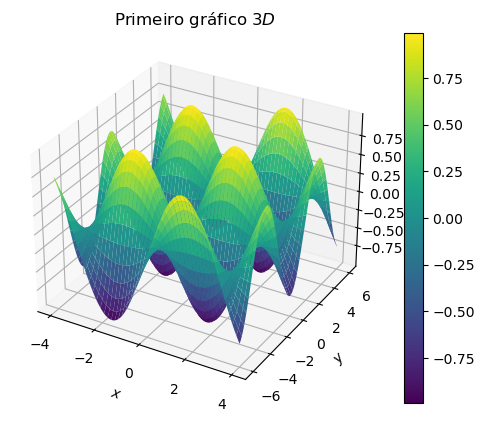

In [28]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo a função de duas variáveis:
f = lambda x, y: np.sin(x) * np.cos(y)

# Criando a grade de pontos (x, y):
xs = np.linspace(-4, 4, 500)    # 100 valores de x igualmente espaçados em [-4, 4]
ys = np.linspace(-6, 6, 100)    # 200 valores de y igualmente espaçados em [-6, 6]

X, Y = np.meshgrid(xs, ys)      # Matrizes 100 x 200 contendo valores de x e y, resp.

# Calculando os valores de z correspondentes:
Z = f(X, Y)     # Z também é uma matriz de forma 100 x 200

# Criando a figura onde o gráfico será plotado:
fig = plt.figure()

# Adicionando uma "tela de plotagem" dentro desta figura.  Este comando é
# necessário porque é possível subdividir um única figura em várias telas e
# plotar um gráfico dentro de cada uma delas:
ax = fig.add_subplot(111, projection='3d')

# Plotando o gráfico:
grafico = ax.plot_surface(X, Y, Z, cmap='viridis')
# `cmap` é abreviação de "color map" (mapa de cor), e configura as cores
# utilizadas. Há várias opções; talves as mais comuns sejam: `viridis`,
# `cividis`, `magma`, `jet`, `inferno`, `plasma`, `cool` e `coolwarm`.

# Adicionando uma barra de cores para ajudar na interpretação:
fig.colorbar(grafico)

# Adicionando rótulos aos eixos:
ax.set_xlabel('$ x $')
ax.set_ylabel('$ y $')
ax.set_zlabel('$ z $')

# Configurando o título:
ax.set_title('Primeiro gráfico $ 3D $')

# Mostrando o gráfico:
plt.show()

__Exercício:__ Verifique que as superfícies construídas desta forma são na
verdade constituídas de triângulos diminuindo a resolução do gráfico, i.e., o
número de pontos em `xs` e `ys` (utilize por exemplo $ 5 $ pontos para cada).

📝 Por que usar triângulos e não outra superfície como bloco de
construção de gráficos? Além da simplicidade, o motivo principal é que
_três pontos determinam univocamente um plano_, portanto se sabemos que
$ (x_1, y_1, z_1) $, $ (x_2, y_2, z_2) $ e $ (x_3, y_3, z_3) $ pertencem ao
gráfico de $ f $, podemos interpolar _linearmente_ as imagens de pontos
no triângulo $ T \subset D $ de vértices $ (x_1, y_1) $, $ (x_2, y_2) $ e 
$ (x_3, y_3) $. Ou seja, podemos preencher as imagens de pontos
de $ T $ a partir daquelas dos seus vértices. Se utilizarmos mais de $ 3 $
pontos como pivôs, não há uma maneira óbvia de interpolar os valores de $ f $.

📝 O procedimento `meshgrid` toma dois vetores como entrada e retorna duas matrizes
que representam as coordenadas da malha. Por exemplo:

In [13]:
xs = np.array([1, 2, 3, 4])
ys = np.array([0, 4])

X, Y = np.meshgrid(xs, ys)
print(f"Matriz X resultante:\n{X}\n")
print(f"Matriz Y resultante:\n{Y}\n")

Matriz X resultante:
[[1 2 3 4]
 [1 2 3 4]]

Matriz Y resultante:
[[0 0 0 0]
 [4 4 4 4]]



Assim:
* A matriz `X` repete o array `xs` ao longo das linhas, com uma linha para cada elemento de `ys`.
* A matriz `Y` repete o vetor `ys` ao longo das colunas, com uma coluna para cada elemento de `xs`.

Observe que elas têm a mesma dimensão $ m \times n $, onde $ m $
(resp. $ n $) é o comprimento de `xs` (resp. `ys`). Portanto se parearmos as
duas matrizes elemento a elemento, obteremos uma matriz $ P $ dos pontos $ (x,
y) $ desejados, onde $ P_{ij} = (x_{i}, y_{j}) $. Depois basta avaliar $ f $ em
cada um destes pontos. Mas com o NumPy podemos pular a construção de $ P $ e
simplesmente avaliar $ f $ em `X` e `Y` diretamente. Por exemplo:

In [14]:
# Vamos tomar f como sendo a função soma:
f = lambda x, y: x + y

print(f(X, Y))
# De novo a dimensão é m x n. A (i, j)-ésima entrada é f(x_i, y_j)

[[1 2 3 4]
 [5 6 7 8]]


__Exemplo 2:__ Complete o fragmento de código abaixo para visualizar o plano descrito pela equação
$$
2x - 3y + z = 7\,.
$$
Use o mapa de cores `jet` (através da opção `cmap=jet` para o comando
`plot_surface`). Siga o mesmo modelo do Exemplo 1.

In [ ]:
# Isole z na equação do plano para obter a expressão da função g
# cujo gráfico é este plano:
g = lambda x, y: # ... complete

# Criação de uma grade de pontos (x, y)
xs = # ... complete com subdivisão do intervalo [-5, 5]
ys = # ... complete com subdivisão do intervalo [-5, 5]

X, Y = # ... crie as matrizes X e Y usando `meshgrid`
Z = # ... avalie g em X e Y para obter as coordenadas z

# Criando uma nova figura:
fig = plt.figure()

# Adicionando a ela de uma tela de plotagem 3D:
ax = fig.add_subplot(111, projection='3d')

# Plotando o plano:
plano = ax.plot_surface # ... complete com os argumentos

# Adicionando a barra de cores para referência:
fig.colorbar(plano)

# Configure os rótulos para os eixos:
# Complete ...

# Exibindo o gráfico:
plt.show()

📝 Para salvar um gráfico num arquivo externo, utilize
`plt.savefig('grafico.png', dpi=200)` ou `plt.savefig('grafico.pdf', dpi=300)`
antes de `plt.show()`. Aqui o parâmetro `dpi` é uma abreviação de _dots per
inch_ e controla a resolução da figura. Teste estes comandos no exemplo acima e
cheque se os arquivos foram realmente criados na mesma pasta.

📝 Experimente utilizar o comando `ax.view_init(45, 45)` (ou com outros valores
para os argumentos) para visualizar o gráfico sob outro ponto de vista. O
primeiro argumento controla o ângulo de elevação (i.e., acima do plano-$ xy $),
e o segundo o ângulo azimutal (i.e., o ângulo ao redor do eixo-$ z $).

__Exercício:__ Considere a superfície $ S $ descrita pela equação
$$
    z = h(x, y) = x^3 - 3xy^2\,.
$$

(a) Visualize $ S $ usando o mapa de cores `cividis` e adicione uma barra de cores.

(b) Sem utilizar o computador, encontre todos os pontos críticos de $ h $ e
classifique-os como máximo local, mínimo local ou ponto de sela.

(c) Você consegue reconhecer o tipo de ponto crítico a partir da figura? Altere
o ângulo de visualização para obter uma perspectiva mais clara.

## $ \S 2 $ Curvas de nível

Seja $ f \colon D \to \mathbb R $ uma função de duas variáveis. Uma
__curva de nível__ de $ f $ é um conjunto onde ela assume um valor constante,
digamos $ c $. Formalmente portanto, a curva de nível $ L_c $ associada à altura
$ z = c $ é dada por
$$
L_c = \{(x, y) \in D : f(x, y) = c \}\,. 
$$
Observe que, ao contrário do gráfico de $ f $ (que mora em $ \mathbb R^3 $), as
curvas de nível são subconjuntos do domínio $ D $, e portanto de $ \mathbb R^2 $.

Para entender o significado geométrico, pense no gráfico de $ f $ como uma
superfície montanhosa a ser explorada. Uma curva de nível é a intersecção do
gráfico da função com um plano de altura fixa. Portanto ela é uma curva ao
longo da qual a altura permanece constante, como num mapa topográfico.

![Mapa topográfico](notebook_09_mapa_topografico.png)


Recorde que _o gradiente $ \nabla f $  é ortogonal a qualquer curva de nível_, já
que em cada ponto ele aponta na direção de maior crescimento da função.


__Exemplo 1:__ Vamos voltar ao exemplo 2 da $ \S 1 $, em que foi considerado o
plano descrito por
$$
    2x - 3y + z = 7\,.
$$
Isolando $ z $ nesta equação, deduzimos que este plano é o gráfico de 
$$
    f(x, y) = 7 - 2x + 3y\,.
$$
Logo a curva de nível $ L_c $ é o conjunto dos $ (x, y) \in \mathbb R^2 $ tais que
\begin{alignat*}{9}
    c &= 7 - 2x + 3y\,, \qquad & & \text{ou ainda,}\\
    y &= \frac{2}{3} x + \frac{c - 7}{3}\,.
\end{alignat*}
Concluímos que todas as curvas de nível de $ f $ são retas de inclinação $
\frac{2}{3} $, e formam uma família de retas paralelas em $ \mathbb R^2 $.
Verifiquemos esta conclusão visualizando estas curvas de nível com ajuda da
função `contour`:

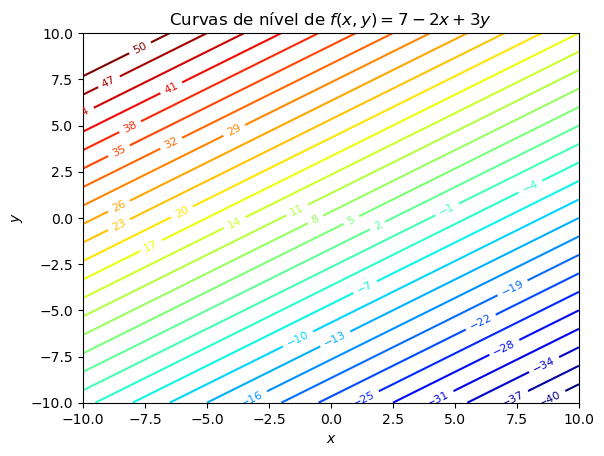

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função:
f = lambda x, y: 7 - 2 * x + 3 * y

# Criando a grade de pontos (x, y):
xs = np.linspace(-10, 10, 400)
ys = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(xs, ys)

# Calculando a matriz dos valores de z:
Z = f(X, Y)

# Plotando as curvas de nível com o procedimento `contour`:
curvas = plt.contour(X, Y, Z, levels=np.linspace(-40, 50, 31), cmap='jet')
# O argumento de `levels` especifica as curvas de nível que queremos
# plotar, no caso 31 valores de c igualmente espaçados entre -40 e 50.

# Adicionando etiquetas às curvas de nível para ajudar na interpretação:
plt.clabel(curvas, inline=True, fontsize=8)

# Adicionando rótulos e um título:
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.title('Curvas de nível de $ f(x, y) = 7 - 2x + 3y $')

# Mostrando as curvas de nível:
plt.show()

__Exemplo 2:__ Vamos determinar as curvas de nível de $ g(x, y) = \ln(1 - x^2 +
y^2) $, que está definida para qualquer $ (x, y) \in \mathbb R^2 $ tal que $ x^2 < 1 +
y^2 $, ou seja, tal que
$$
    -\sqrt{1 + y^2} < x < \sqrt{1 + y^2}\,.
$$
O domínio $ D $ neste caso é portanto a região compreendida entre as duas
componentes da hipérbole de equação $ x^2 = 1 + y^2 $.

Seja $ c \in \mathbb R $. Temos:
\begin{alignat*}{3}
    & \quad & \ln(1 - x^2 + y^2) &= c \\
    & \Longleftrightarrow\quad  & 1 - x^2 + y^2 &= e^c \\
    & \Longleftrightarrow\quad  & x^2 &= 1 - e^c + y^2 \\
    & \Longleftrightarrow\quad  & x &= \pm \sqrt{1 - e^c + y^2}\,.
\end{alignat*}
Portanto, cada curva de nível de $ g $ é uma _hipérbole_, exceto para $ c = 0
$, caso em que a curva de nível consiste das retas $ y = \pm x $. Este exemplo
ilustra que uma curva de nível pode ser _desconexa_ (formada por mais de um
"pedaço").

Verifiquemos estas conclusões plotando as curvas de nível. Adicionaremos ao gráfico
uma _barra de cores_ (`colorbar`), que nos ajuda a entender qual curva corresponde a
qual valor de $ z $.

/tmp/ipykernel_233358/4227453380.py:1: RuntimeWarning: invalid value encountered in log
  g = lambda x, y: np.log(1 - x**2 + y**2)


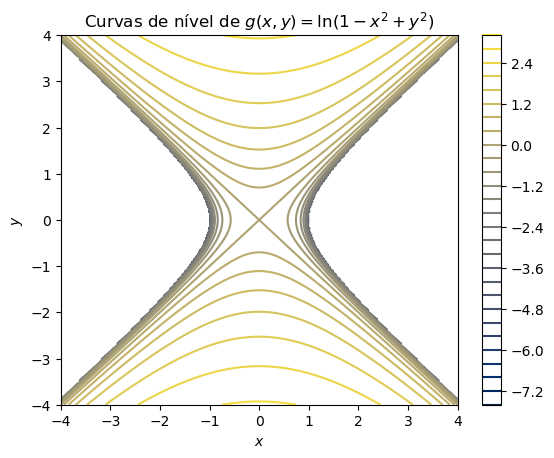

In [37]:
g = # complete a definição de g

# Criando a malha de pontos (x, y) e os valores correspondentes de z:
xs = # complete ...
ys = # complete ...
X, Y = # complete ...
Z = # complete ...

# Plote as curvas de nível, incluindo etiquetas:
contour = # ...
# ...

# Adicione rótulos e título:
# ...
# ...
# ...

# Mostre o resultado:
# ...

__Exemplo 3:__ O potencial elétrico $ V $ em um ponto $ (x, y) $ no plano devido
a um conjunto de cargas pontuais $ q_1, \cdots, q_n $ localizadas em $ (x_1,
y_1), \cdots, (x_n, y_n) \in \mathbb R^2 $ é a soma dos potenciais gerados por
cada carga individual:
$$
    V(x, y) = k\sum_{i=1}^n\frac{q_i}{\sqrt{(x - x_i)^2 + (y - y_i)^2}}
$$
onde $ k \approx 8.99 \times 10^{-9}\, N \cdot m^2 \cdot C^{-2} $ é a _constante
de Coulomb_.

Suponha que três cargas estejam dispostas no plano de modo que
$$
    (q_1, x_1, y_1)  = (-1, 1, 0)\,, \quad (q_2, x_2, y_2) = (2, -1, 0),\, \quad (q_3, x_3, y_3) = \big(-1, 0, \sqrt{3}\big)
$$
Assim, elas são vértices de um triângulo equilátero e a soma total das cargas é
nula. Vamos visualizar as curvas de contorno do potencial $ V $ resultante.
Como $ V $ tende a $ \pm \infty $ quando $ (x, y) $ tende à posição de uma das
cargas, é necessário restringir atenção à região consistindo de pontos a uma
distância de no mínimo $ \delta $ (digamos $ \delta = \frac{1}{5} $)
de todas elas.

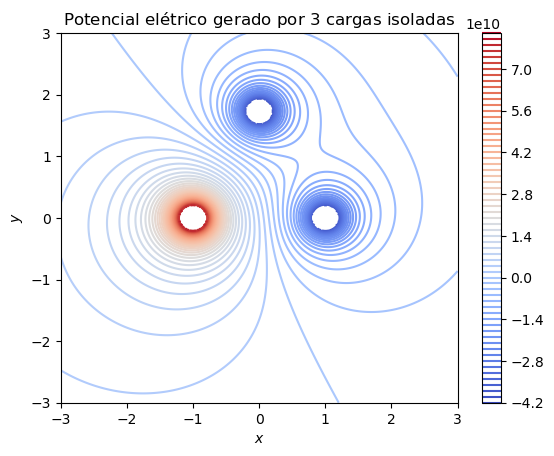

In [10]:
# Definindo a constante de Coulomb:
k = 8.99e9

# Definindo as posições e magnitudes das cargas:
q1, x1, y1 = -1, 1, 0 
q2, x2, y2 = 2, -1, 0 
q3, x3, y3 = -1, 0, np.sqrt(3)

# Definindo a função de potencial elétrico:
def V(x, y):
    """Potencial elétrico devido a três cargas pontuais."""
    V1 = k * q1 / np.sqrt((x - x1)**2 + (y - y1)**2)
    V2 = k * q2 / np.sqrt((x - x2)**2 + (y - y2)**2)
    V3 = k * q3 / np.sqrt((x - x3)**2 + (y - y3)**2)
    return V1 + V2 + V3

# Criando a grade de pontos (x, y):
xs = np.linspace(-3, 3, 400)
ys = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(xs, ys)

# Calculando V e aplicando a limitação de distância:
Z = V(X, Y)
delta = 1 / 5  # distância mínima

# Máscara para filtrar regiões próximas às cargas:
mask = (np.sqrt((X - x1)**2 + (Y - y1)**2) > delta) & \
       (np.sqrt((X - x2)**2 + (Y - y2)**2) > delta) & \
       (np.sqrt((X - x3)**2 + (Y - y3)**2) > delta)
       
Z = np.where(mask, Z, np.nan)  # Aplicando a máscara

# Plotando as curvas de nível:
contour = plt.contour(X, Y, Z, levels=80, cmap='coolwarm')
# Usando uma barra de cores (em vez de etiquetas) para auxiliar a interpretação:
plt.colorbar(contour)

# Adicionando rótulos:
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.title('Potencial elétrico gerado por $ 3 $ cargas isoladas')

# Mostrando o resultado:
plt.show()

__Exercício:__ Seja
$$
    f(x, y) = (\cos x)\,(\cos y)\,\exp\bigg(\frac{-\sqrt{x^2 + y^2}}{4}\bigg)\,.
$$

(a) Visualize o gráfico de $ f $ sobre o quadrado $ \big[-2\pi\,,\,2\pi\big] \times \big[-2\pi\,,\,2\pi\big]$.

(b) Plote as curvas de nível de $ f $ dentro desta região.

(c) Descreva (sem ajuda do computador) a curva de nível passando pelo ponto $ \big(\pi, \frac{\pi}{2}\big) $. Ela é conexa?

__Exercício:__ Considere a superfície $ S $ dada pela equação
$$ z = \frac{x^2}{4} + \frac{y^2}{9}\,. $$

(a) Determine as curvas de nível $ L_c $ de $ S $ ($ c \in \mathbb R $). Em particular, descreva o que
acontece na transição de valores negativos para positivos de $ c $.

(b) Descreva as intersecções de $ S $ com planos dados por $ y = c $ (em vez de $ z = c $).

(c) Plote as curvas de nível dos itens (a) e (b).

__Exercício:__ Seja 
$$
    h(x, y) = x \sin\Big(\frac{y}{2}\Big) + y\sin\big(2x\big)
$$
definida em $ D = \big[0, 5\pi\big] \times \big[0, 5\pi\big] $.

(a) Plote o gráfico de $ h $.

(b) Visualize as curvas de nível de $ h $.